In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Basic Data Science and ML Pipeline

## OSEMN Pipeline

- **O** - Obtaining our data
- **S** - Scrubbing / Cleaning our data
- **E** - Exploring / Visualizing our data will allow us to find patterns and trends
- **M** - Modeling our data will give us our predictive power as a wizard
- **N** - INterpreting our data

# **O - Obtaining our data**

In [2]:
#Loading the dataset
df = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


What are the columns

In [3]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **S - Scrubbing / Cleaning our data**

### **handling missing values**

checking for NaN values

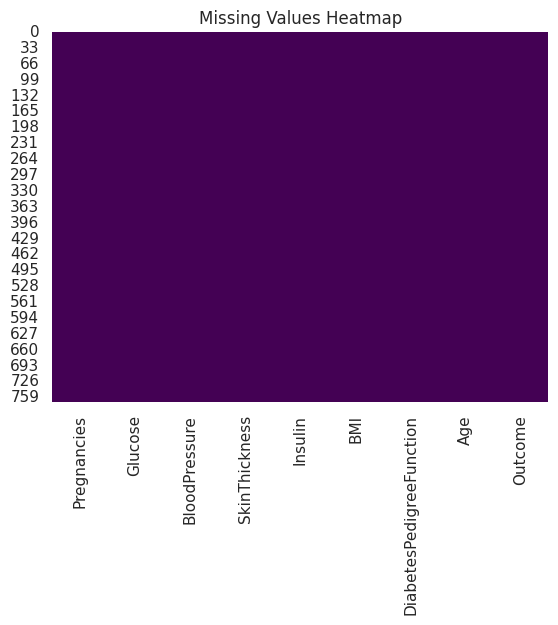

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
# Example: Impute missing values with the median
df.fillna(df.median(), inplace=True)

In [7]:
columns = ['DiabetesPedigreeFunction','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [36]:
df[columns].isna().sum()  # Check if NaNs have been filled

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


checking zeros

In [31]:
# Check for zeros in key columns that should not have zero values
columns_with_possible_zeros = ['DiabetesPedigreeFunction','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[columns_with_possible_zeros] == 0).sum()

,0
DiabetesPedigreeFunction,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


In [32]:
import numpy as np

df[columns_with_possible_zeros] = df[columns_with_possible_zeros].replace(0, np.nan)

In [33]:
(df[columns_with_possible_zeros] == 0).sum()

,0
DiabetesPedigreeFunction,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


### **handling outliers**

1. **Visualize the Outliers**

Before Outliers Removal


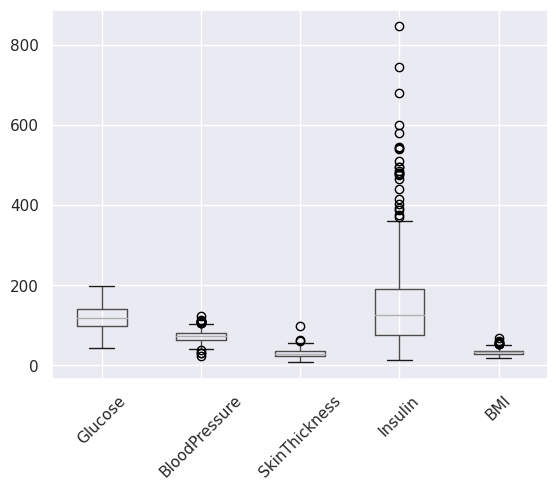

In [12]:
print('Before Outliers Removal')
df.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
plt.xticks(rotation=45)  # Rotate x-tick labels
plt.show()

2. **Identify Outliers Using the IQR Method**

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]
print(f"Number of outliers in 'Insulin': {len(outliers)}")

Number of outliers in 'Insulin': 24


3. **Handle Outliers**

In [14]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

a. **Remove Outliers**
- This approach is straightforward but may lead to data loss if many outliers exist.

In [15]:
def remove_outliers(df, columns):

    df_cleaned = df.copy()  # Make a copy to avoid modifying the original DataFrame

    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        # Filter to exclude outliers
        filter = (df_cleaned[column] >= Q1 - 1.5 * IQR) & (df_cleaned[column] <= Q3 + 1.5 * IQR)
        df_cleaned = df_cleaned[filter]

    return df_cleaned

# Apply to specified columns
df_cleaned = remove_outliers(df, columns)

After Outliers Removal


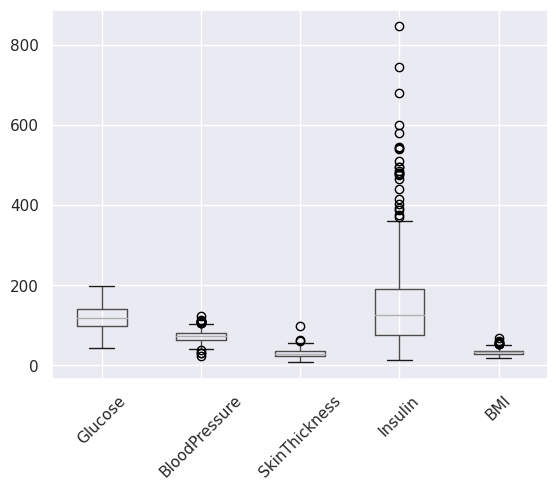

In [16]:
print('After Outliers Removal')
df.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
plt.xticks(rotation=45)  # Rotate x-tick labels
plt.show()

b. **Impute Outliers**
- Replace outliers with the median or mean value

In [17]:
def impute_outliers_with_mean(df, columns):

    df_imputed = df.copy()  # Make a copy to avoid modifying the original DataFrame

    for column in columns:
        Q1 = df_imputed[column].quantile(0.25)
        Q3 = df_imputed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df_imputed[column] < lower_bound) | (df_imputed[column] > upper_bound)

        # Calculate mean of non-outlier values
        mean_value = df_imputed.loc[~outliers, column].mean()

        # Impute outliers with mean value
        df_imputed.loc[outliers, column] = mean_value

    return df_imputed

# Impute outliers with mean values
df_imputed = impute_outliers_with_mean(df, columns)

After Outliers Removal


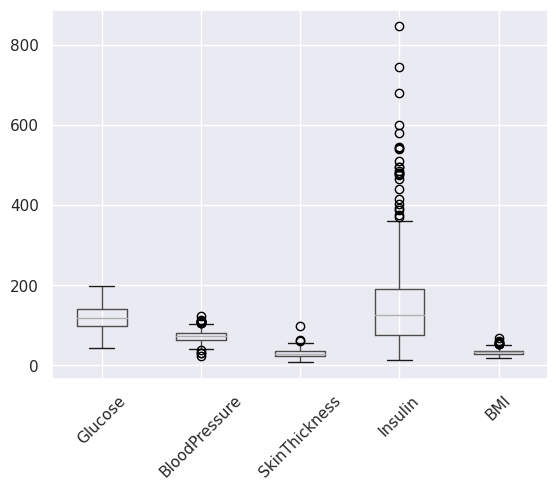

In [18]:
print('After Outliers Removal')
df.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
plt.xticks(rotation=45)  # Rotate x-tick labels
plt.show()

c. **Cap Outliers**
- Set outliers to the lower or upper bound to minimize their impact

In [19]:
def cap_outliers(df, columns, lower_percentile=1, upper_percentile=99):

    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    for column in columns:
        lower_bound = df_capped[column].quantile(lower_percentile / 100)
        upper_bound = df_capped[column].quantile(upper_percentile / 100)
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

# Apply outlier capping to specified columns
df_capped = cap_outliers(df, columns)

After Outliers Removal


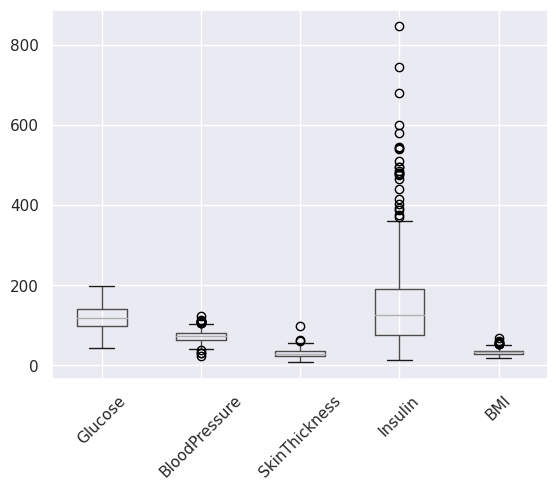

In [20]:
print('After Outliers Removal')
df.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
plt.xticks(rotation=45)  # Rotate x-tick labels
plt.show()

4. **Review the Changes**

In [21]:
df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.316384,119.776836,70.463277,28.468927,132.579096,32.426554,0.513105,30.663842,0.305085
std,3.217588,29.267902,11.140110,10.063841,73.215973,6.237820,0.314404,10.028712,0.461095
min,0.000000,56.000000,40.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.250000,62.000000,20.250000,75.000000,27.825000,0.269250,23.000000,0.000000
50%,2.000000,117.000000,70.000000,29.000000,120.000000,32.900000,0.449500,27.000000,0.000000
75%,5.000000,138.000000,78.000000,35.750000,176.000000,36.575000,0.678000,36.000000,1.000000
max,17.000000,198.000000,102.000000,52.000000,342.000000,47.900000,2.288000,81.000000,1.000000


5. **Revisualize the Cleaned Data**

After Outliers Removal


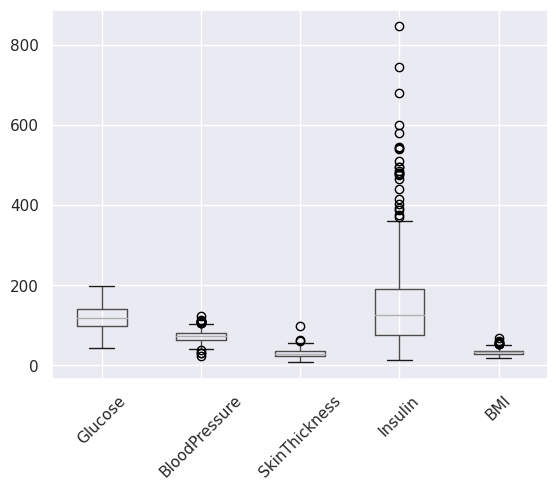

In [22]:
print('After Outliers Removal')
df.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
plt.xticks(rotation=45)  # Rotate x-tick labels
plt.show()

#  **Check for Duplicates**

In [23]:
# Check for duplicates
df_cleaned.duplicated().sum()

# Remove duplicates if any
df_cleaned.drop_duplicates(inplace=True)

# **Normalize or Scale the Data**

1. Min-Max Scaling

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df_cleaned is your DataFrame
scaler = MinMaxScaler()

# Select columns to scale
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fit and transform the data
df_scaled = df_cleaned.copy()  # Create a copy to avoid modifying the original DataFrame
df_scaled[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

# Display the scaled DataFrame
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,0.058824,0.232394,0.419355,0.355556,0.241590,0.333333,0.037222,0.000000,0
4,0.000000,0.570423,0.000000,0.622222,0.467890,0.838384,1.000000,0.200000,1
6,0.176471,0.154930,0.161290,0.555556,0.223242,0.430976,0.073990,0.083333,1
14,0.294118,0.774648,0.516129,0.266667,0.489297,0.255892,0.227871,0.500000,1
16,0.000000,0.436620,0.709677,0.888889,0.657492,0.929293,0.211530,0.166667,1


2. Standardization (Z-score Normalization)

In [25]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()

# Fit and transform the data
df_standardized = df_cleaned.copy()  # Create a copy to avoid modifying the original DataFrame
df_standardized[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

# Display the standardized DataFrame
df_standardized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.720932,-1.053044,-0.401216,-0.544193,-0.527668,-0.694582,-1.102386,-0.964981,0
4,-1.032164,0.589299,-2.738429,0.649883,0.484471,1.713508,5.653263,0.233277,1
6,-0.098469,-1.429415,-1.839501,0.351364,-0.609733,-0.229018,-0.844391,-0.465707,1
14,0.523995,1.581548,0.138140,-0.942218,0.580214,-1.063822,0.235366,2.030664,1
16,-1.032164,-0.060795,1.216854,1.843958,1.332480,2.146964,0.120702,0.033567,1


# **E - Exploring / Visualizing our data will allow us to find patterns and trends**

### Numerical data

**inferences:**
- The mean number of pregnancies is relatively low, but the range indicates some individuals have many pregnancies. The distribution is slightly skewed to the right.
- Glucose levels have a wide range, with a high mean, indicating variability in glucose measurements. The mean is close to the upper end of the normal range for glucose levels, suggesting that high glucose levels might be common in this dataset.
- Blood pressure values are varied, with the mean being on the higher end of the normal range. The wide range may indicate both high and low blood pressure readings.
- The mean skin thickness is relatively high, with a very large range, suggesting a wide variation in skin thickness among individuals.
- Insulin levels vary greatly, with the mean being quite high. This may indicate the presence of extreme outliers or data errors, as the maximum value (846) is significantly higher than typical physiological ranges.
- This function varies moderately. The range is not extremely wide, but the mean is more than halfway between the minimum and maximum, indicating some variability.
- The age distribution is fairly wide, with a mean in the mid-range of the dataset. Most individuals fall within the age range of 21 to 81, with a somewhat skewed distribution towards the younger end.
- The mean outcome of 0.35 suggests that approximately 35% of the dataset has a positive outcome (e.g., presence of diabetes). This aligns with the fact that the outcome is binary.

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visualizing Numerical Data

1. Histograms

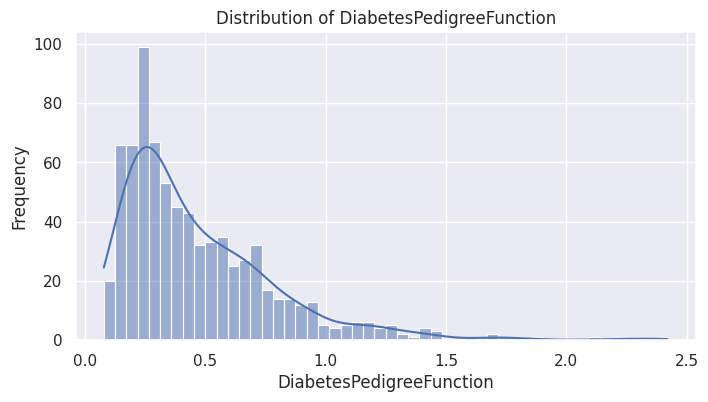

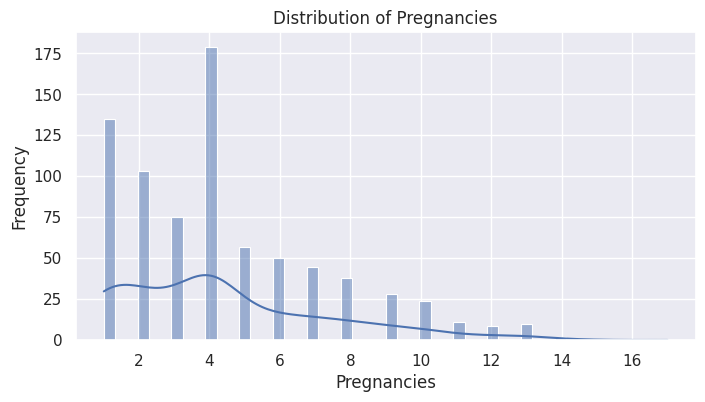

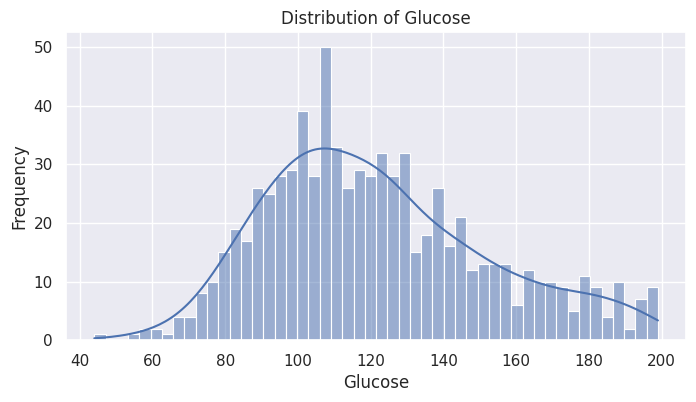

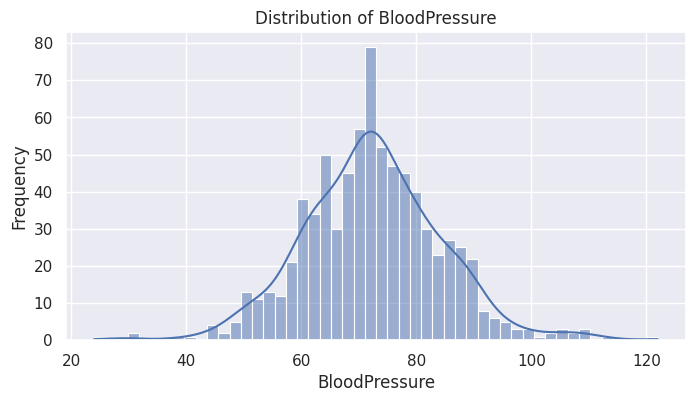

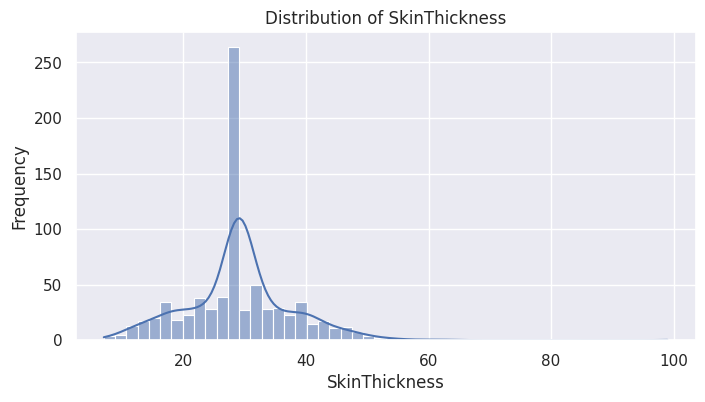

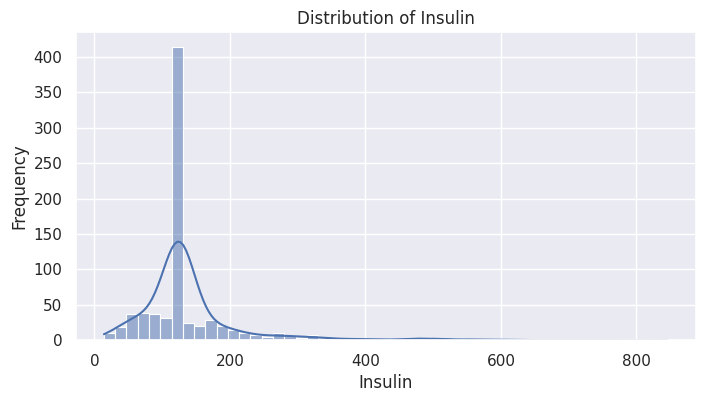

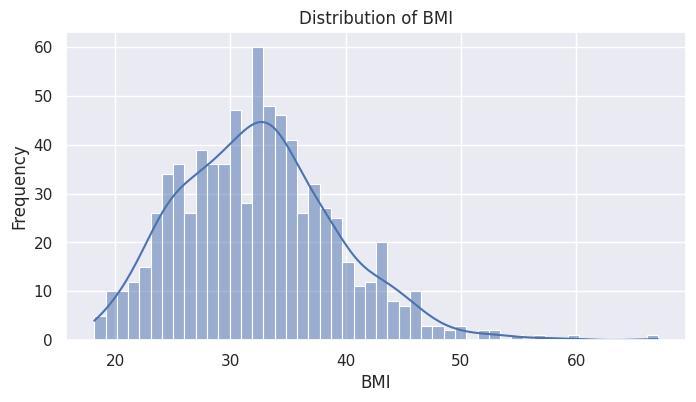

In [39]:
# Define a small figure size for clarity
figsize = (8, 4)

# Plot histograms for numerical columns
numerical_columns = ['DiabetesPedigreeFunction','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in numerical_columns:
    plt.figure(figsize=figsize)
    sns.histplot(df[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

2. Box Plots

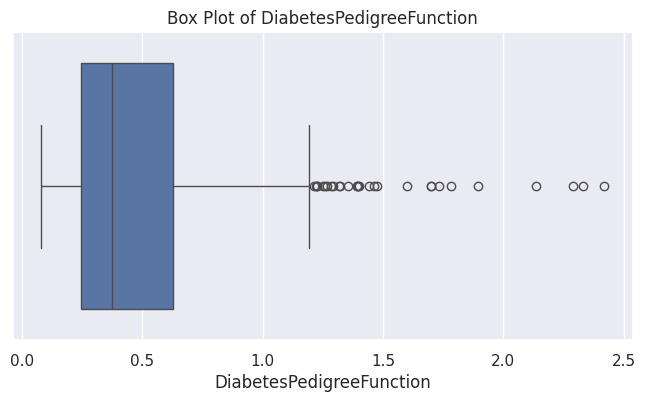

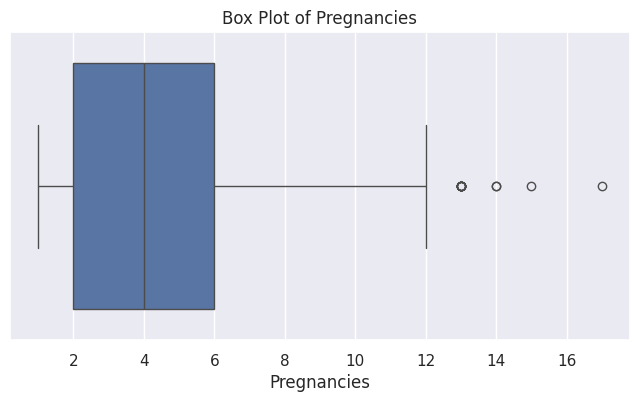

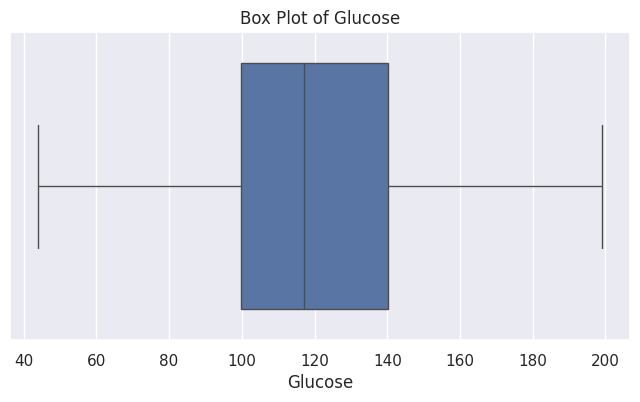

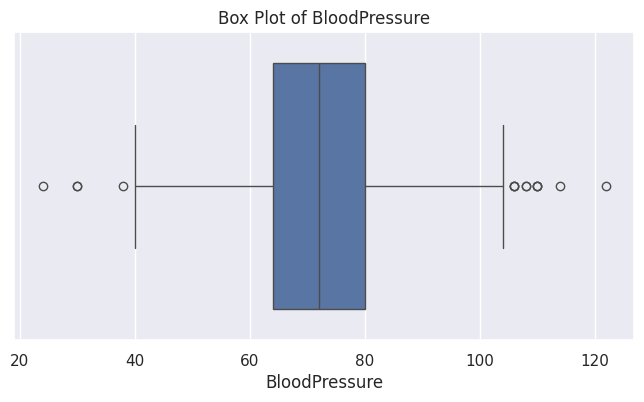

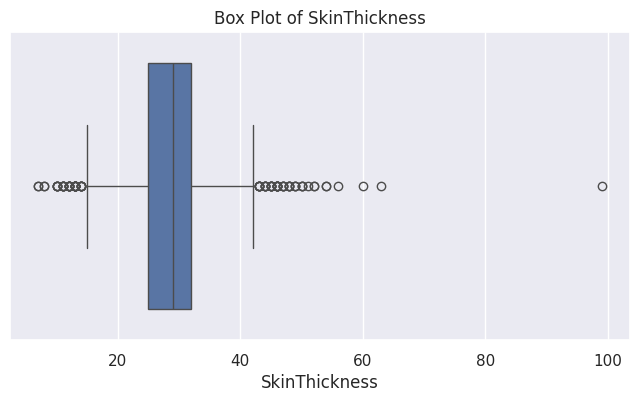

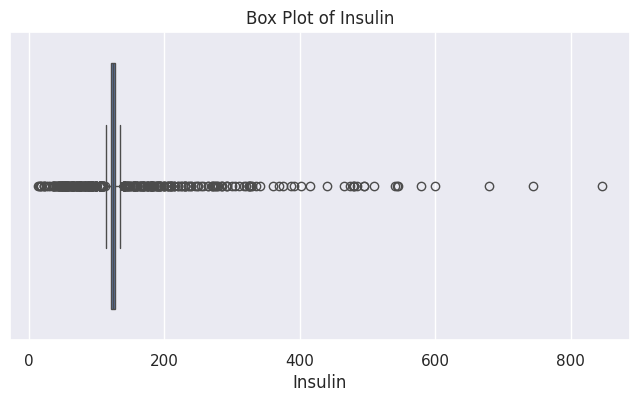

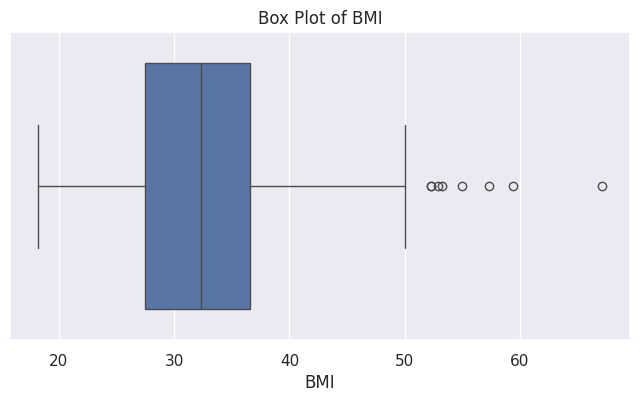

In [40]:
# Plot box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

3. Pair Plots

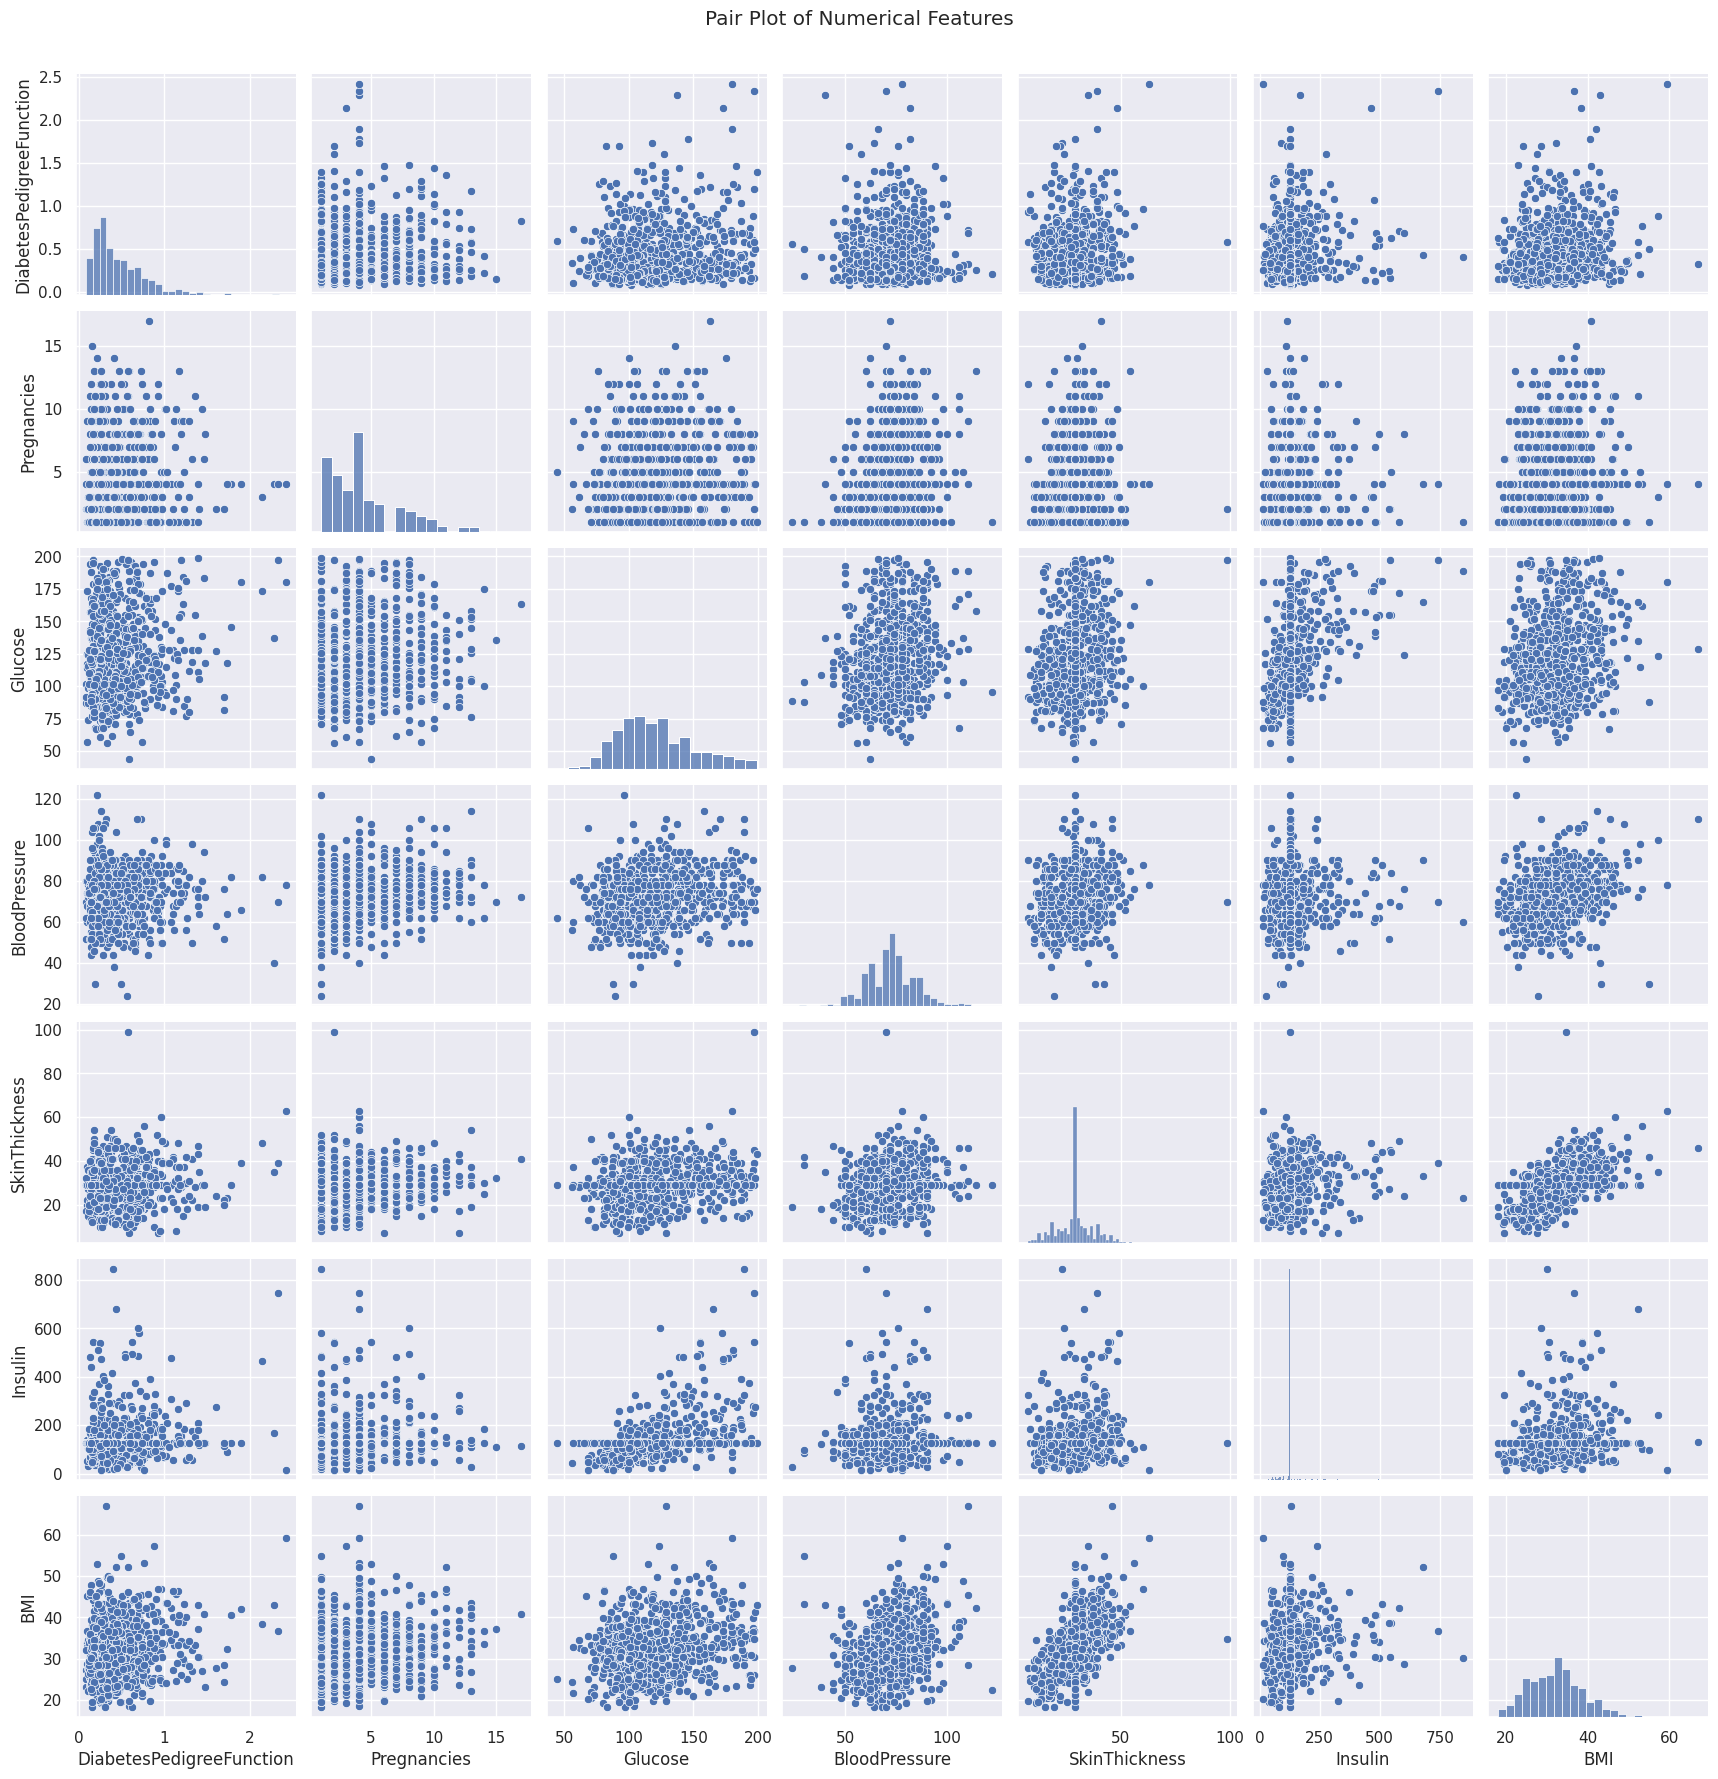

In [41]:
# Pair plot for numerical features
numerical_df = df[numerical_columns].dropna()
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

4. Correlation Heatmap

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### categorical data

In [43]:
# df.describe(include=['O'])

# **M - Modeling our data will give us our predictive power as a wizard**

Training the Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df_scaled.drop('Outcome', axis=1)  # Features
y = df_scaled['Outcome']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the Model

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[45  2]
 [ 9 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        47
           1       0.88      0.62      0.73        24

    accuracy                           0.85        71
   macro avg       0.86      0.79      0.81        71
weighted avg       0.85      0.85      0.84        71



Tuning and Improving

In [47]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.7772556390977443


# **N - INterpreting our data**

1. **Understand Feature Importance**

In [48]:
import pandas as pd

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature  Importance
1                   Glucose    0.234717
4                   Insulin    0.150380
5                       BMI    0.137665
6  DiabetesPedigreeFunction    0.122903
7                       Age    0.121255
0               Pregnancies    0.079636
2             BloodPressure    0.077336
3             SkinThickness    0.076108


2. **Analyze Model Performance**

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[45  2]
 [ 9 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        47
           1       0.88      0.62      0.73        24

    accuracy                           0.85        71
   macro avg       0.86      0.79      0.81        71
weighted avg       0.85      0.85      0.84        71



3. **Visualize Model Results**

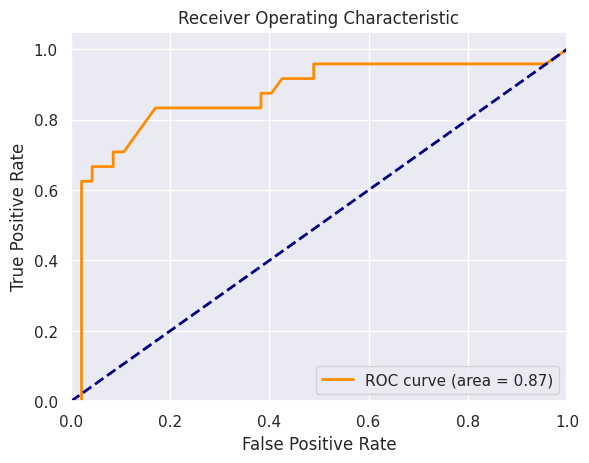

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Feature Pair Plots: Visualize relationships between features and the target variable.

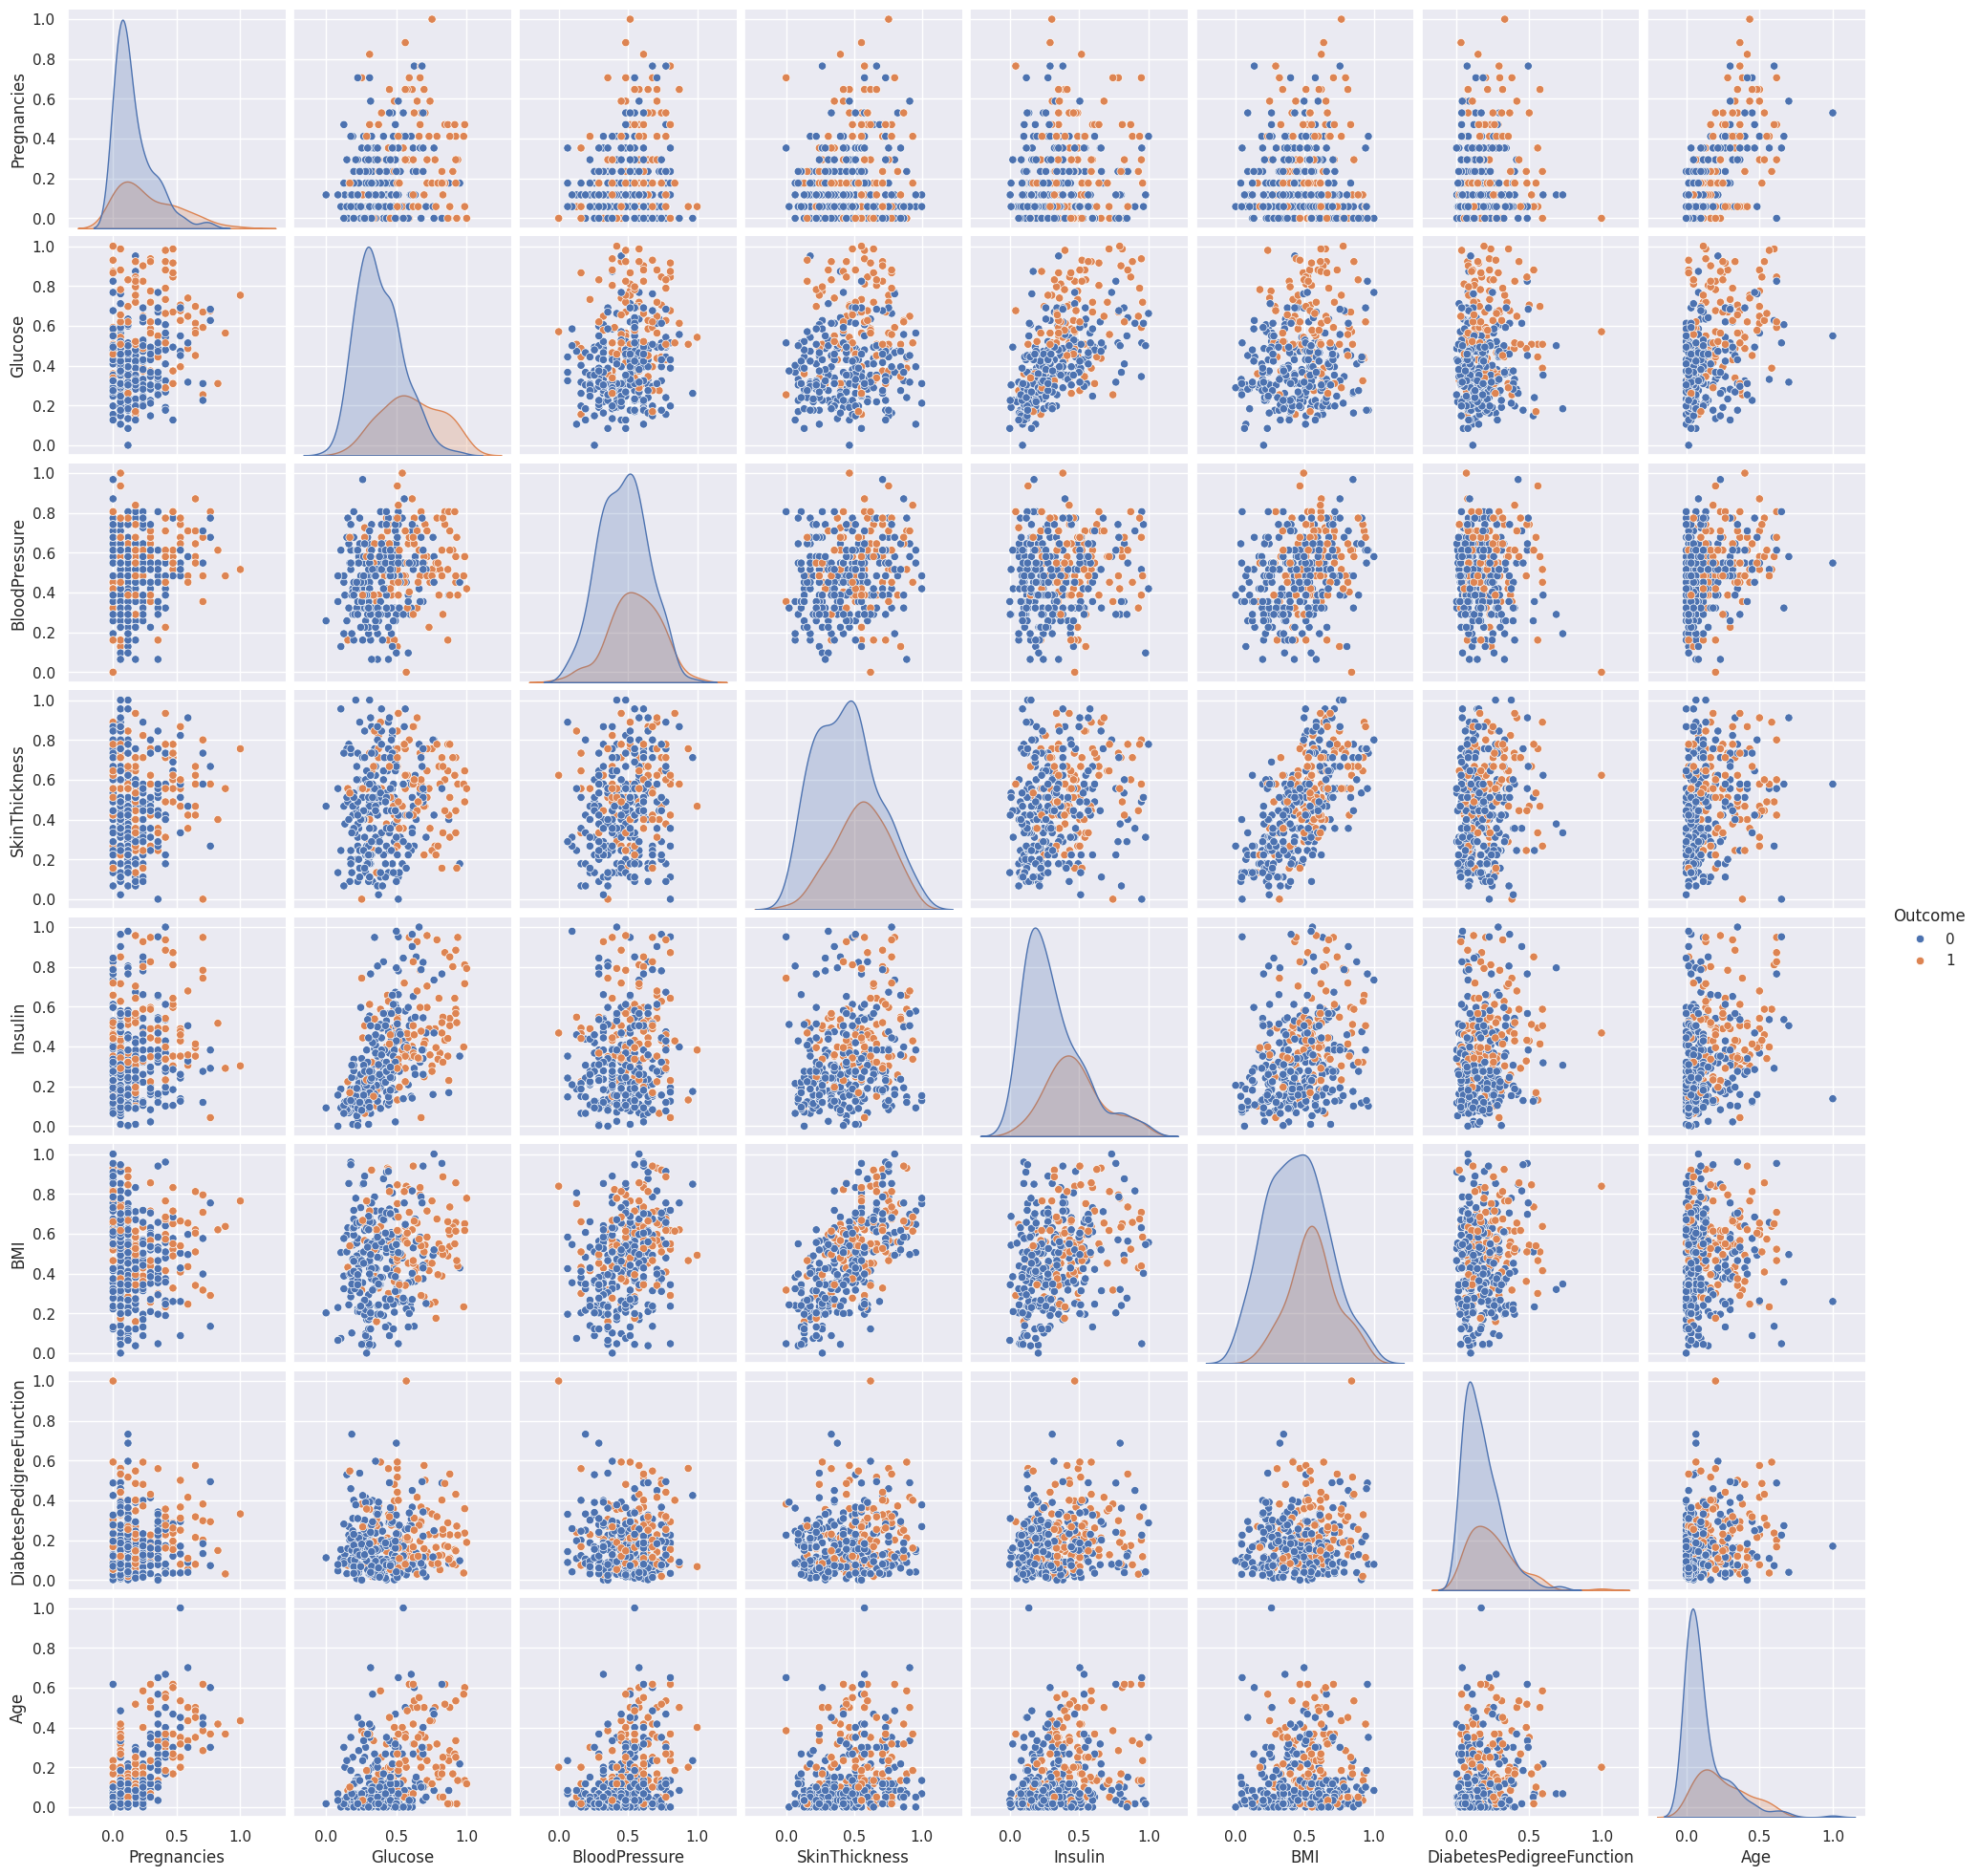

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plots of features
sns.pairplot(df_scaled, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

4. **Analyze Model Errors**

In [52]:
# Identify misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
misclassified_samples = X_test.iloc[misclassified_indices]

print("Misclassified samples:\n", misclassified_samples)

Misclassified samples:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
480     0.176471  0.718310       0.483871       0.511111  0.957187  0.582492   
40      0.176471  0.873239       0.387097       0.400000  0.168196  0.531987   
197     0.176471  0.359155       0.354839       0.133333  0.100917  0.158249   
298     0.823529  0.309859       0.612903       0.400000  0.516820  0.619529   
214     0.529412  0.394366       0.677419       0.555556  0.489297  0.538721   
744     0.764706  0.683099       0.774194       0.666667  0.382263  0.754209   
19      0.058824  0.415493       0.483871       0.511111  0.247706  0.552189   
188     0.470588  0.373239       0.580645       0.711111  0.302752  0.326599   
114     0.411765  0.732394       0.225806       0.555556  0.489297  0.414141   
171     0.352941  0.549296       0.483871       0.355556  0.351682  0.579125   
199     0.235294  0.647887       0.322581       0.444444  0.926606  0.427609   

     DiabetesPe